In [1]:
import keras
from keras import layers

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
encoding_dim = 32

In [3]:
input_img = keras.Input(shape=(784,))

In [4]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [5]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [6]:
autoencoder = keras.Model(input_img, decoded)

In [7]:
encoder = keras.Model(input_img, encoded)

In [8]:

encoded_input = keras.Input(shape=(encoding_dim,))


decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2753 - val_loss: 0.1864
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1684 - val_loss: 0.1512
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1426 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1278 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1175 - val_loss: 0.1121
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1101 - val_loss: 0.1061
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1050 - val_loss: 0.1017
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1014 - val_loss: 0.0987
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0988 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0971 - val_lo

In [13]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


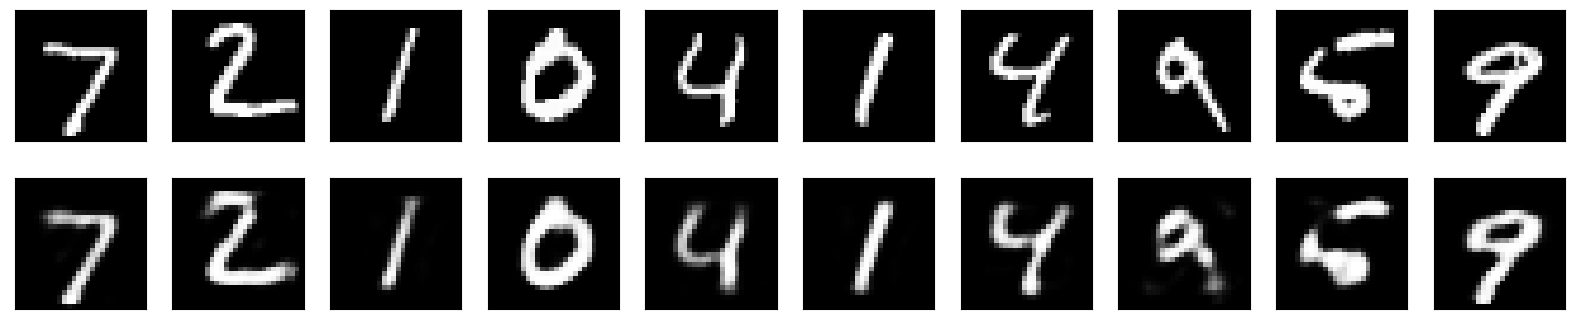

In [16]:

import matplotlib.pyplot as plt
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()